The given data is a univariate regression problem and will be forecasted using traditional statistical models.

Importing the Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys

Loading the dataset

In [4]:
trends = pd.read_csv(r'D:\Omnilytics\trends1.csv')
predict = pd.read_csv(r'D:\Omnilytics\predictions.csv')

In [5]:
trends

,Unnamed: 0,top 1,top 2,top 3,date
0,0,4,14,14,2012-10-07
1,1,7,15,18,2012-10-14
2,2,5,12,15,2012-10-21
3,3,5,15,12,2012-10-28
4,4,4,12,12,2012-11-04
...,...,...,...,...,...
256,256,18,72,35,2017-09-03
257,257,17,67,37,2017-09-10
258,258,18,66,32,2017-09-17
259,259,19,62,31,2017-09-24


In [6]:
trends = trends.drop('Unnamed: 0',axis=1)
predict = predict.drop('Unnamed: 0',axis=1)

In [7]:
trends

,top 1,top 2,top 3,date
0,4,14,14,2012-10-07
1,7,15,18,2012-10-14
2,5,12,15,2012-10-21
3,5,15,12,2012-10-28
4,4,12,12,2012-11-04
...,...,...,...,...
256,18,72,35,2017-09-03
257,17,67,37,2017-09-10
258,18,66,32,2017-09-17
259,19,62,31,2017-09-24


In [12]:
predict

,date,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1
0,2012-10-07,6.464020,14.918372,12.852700,17.560586,16.691433,21.967562,19.348604,6.676299,6.814028
1,2012-10-14,6.405044,14.879459,13.460605,17.584433,16.864402,20.428943,18.149665,6.553469,6.678460
2,2012-10-21,5.594880,12.766397,12.500809,16.287381,15.672930,17.533925,15.621429,5.685904,5.801919
3,2012-10-28,4.556118,9.883558,11.040882,14.667064,14.128378,14.478612,13.020325,4.598339,4.706192
4,2012-11-04,4.203193,8.345088,10.553082,14.029395,13.566908,12.894532,11.970428,4.200978,4.297650
...,...,...,...,...,...,...,...,...,...,...
621,2018-09-27,16.588328,98.782168,36.344867,36.316258,36.037766,73.258258,64.549945,17.507205,17.533665
622,2018-09-28,16.655365,98.884051,36.503322,36.415425,36.139121,73.103604,64.319097,17.567572,17.594394
623,2018-09-29,16.724295,99.019655,36.689969,36.538825,36.265359,72.967858,64.104769,17.629760,17.656862
624,2018-09-30,16.794364,99.184409,36.900044,36.682254,36.412168,72.847916,63.903832,17.693017,17.720324


Setting the date for both the dataframes

In [15]:
trends = trends.set_index('date')
trends.index = pd.to_datetime(trends.index, format='%Y-%m-%d')

In [16]:
trends.index

DatetimeIndex(['2012-10-07', '2012-10-14', '2012-10-21', '2012-10-28',
               '2012-11-04', '2012-11-11', '2012-11-18', '2012-11-25',
               '2012-12-02', '2012-12-09',
               ...
               '2017-07-30', '2017-08-06', '2017-08-13', '2017-08-20',
               '2017-08-27', '2017-09-03', '2017-09-10', '2017-09-17',
               '2017-09-24', '2017-10-01'],
              dtype='datetime64[ns]', name='date', length=261, freq=None)

In [17]:
predict.index

RangeIndex(start=0, stop=626, step=1)

In [18]:
predict = predict.set_index('date')
predict.index = pd.to_datetime(predict.index, format='%Y-%m-%d')

In [19]:
predict.index

DatetimeIndex(['2012-10-07', '2012-10-14', '2012-10-21', '2012-10-28',
               '2012-11-04', '2012-11-11', '2012-11-18', '2012-11-25',
               '2012-12-02', '2012-12-09',
               ...
               '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25',
               '2018-09-26', '2018-09-27', '2018-09-28', '2018-09-29',
               '2018-09-30', '2018-10-01'],
              dtype='datetime64[ns]', name='date', length=626, freq=None)

Arranging the date in an order

In [20]:
trends = trends.sort_index()
all(trends.index == trends.sort_index().index)

True

In [22]:
predict = predict.sort_index()
all(predict.index == predict.sort_index().index)

True

Count the trends, prediction dataframe by year

In [23]:
trends.groupby(trends.index.year).count()

,top 1,top 2,top 3
date,,,
2012,13,13,13
2013,52,52,52
2014,52,52,52
2015,52,52,52
2016,52,52,52
2017,40,40,40


In [25]:
predict.groupby(predict.index.year).count()

,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1
date,,,,,,,,,
2012,13,13,13,13,13,13,13,13,13
2013,52,52,52,52,52,52,52,52,52
2014,52,52,52,52,52,52,52,52,52
2015,52,52,52,52,52,52,52,52,52
2016,52,52,52,52,52,52,52,52,52
2017,131,131,131,131,131,131,131,131,131
2018,274,274,274,274,274,274,274,274,274


In [27]:
predict[predict.index > trends.index[-1]]

,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1
date,,,,,,,,,
2017-10-02,20.690474,81.535730,33.178857,32.568202,32.415030,71.522001,67.242059,20.836497,20.837067
2017-10-03,20.756541,81.754884,33.427374,32.743588,32.594721,71.425920,67.057360,20.895536,20.896159
2017-10-04,20.818364,81.976542,33.675383,32.918021,32.773468,71.327518,66.868190,20.950277,20.950937
2017-10-05,20.874311,82.193610,33.917098,33.086472,32.946110,71.222035,66.669935,20.999101,20.999798
2017-10-06,20.922699,82.399049,34.146950,33.244126,33.107702,71.104797,66.458101,21.040336,21.041087
...,...,...,...,...,...,...,...,...,...
2018-09-27,16.588328,98.782168,36.344867,36.316258,36.037766,73.258258,64.549945,17.507205,17.533665
2018-09-28,16.655365,98.884051,36.503322,36.415425,36.139121,73.103604,64.319097,17.567572,17.594394
2018-09-29,16.724295,99.019655,36.689969,36.538825,36.265359,72.967858,64.104769,17.629760,17.656862


Plotting the graph for the above results

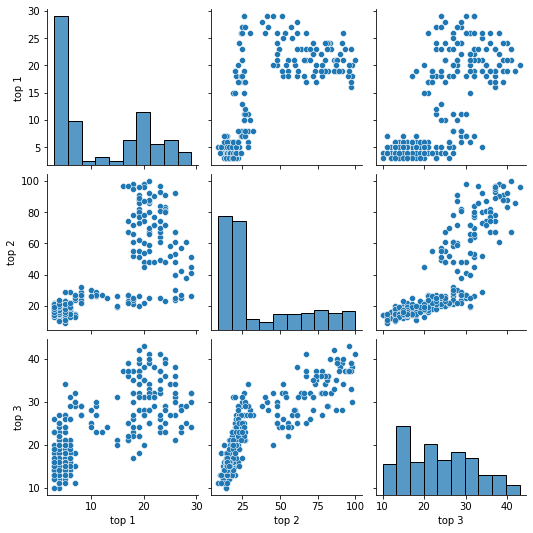

In [31]:
sns.pairplot(trends)

The growths are measured on average growth / decline percentage.

Plotting the graph based on months, years.

In [35]:
trends_month = trends.groupby(trends.index.month).mean()
trends_year = trends.groupby(trends.index.year).mean()

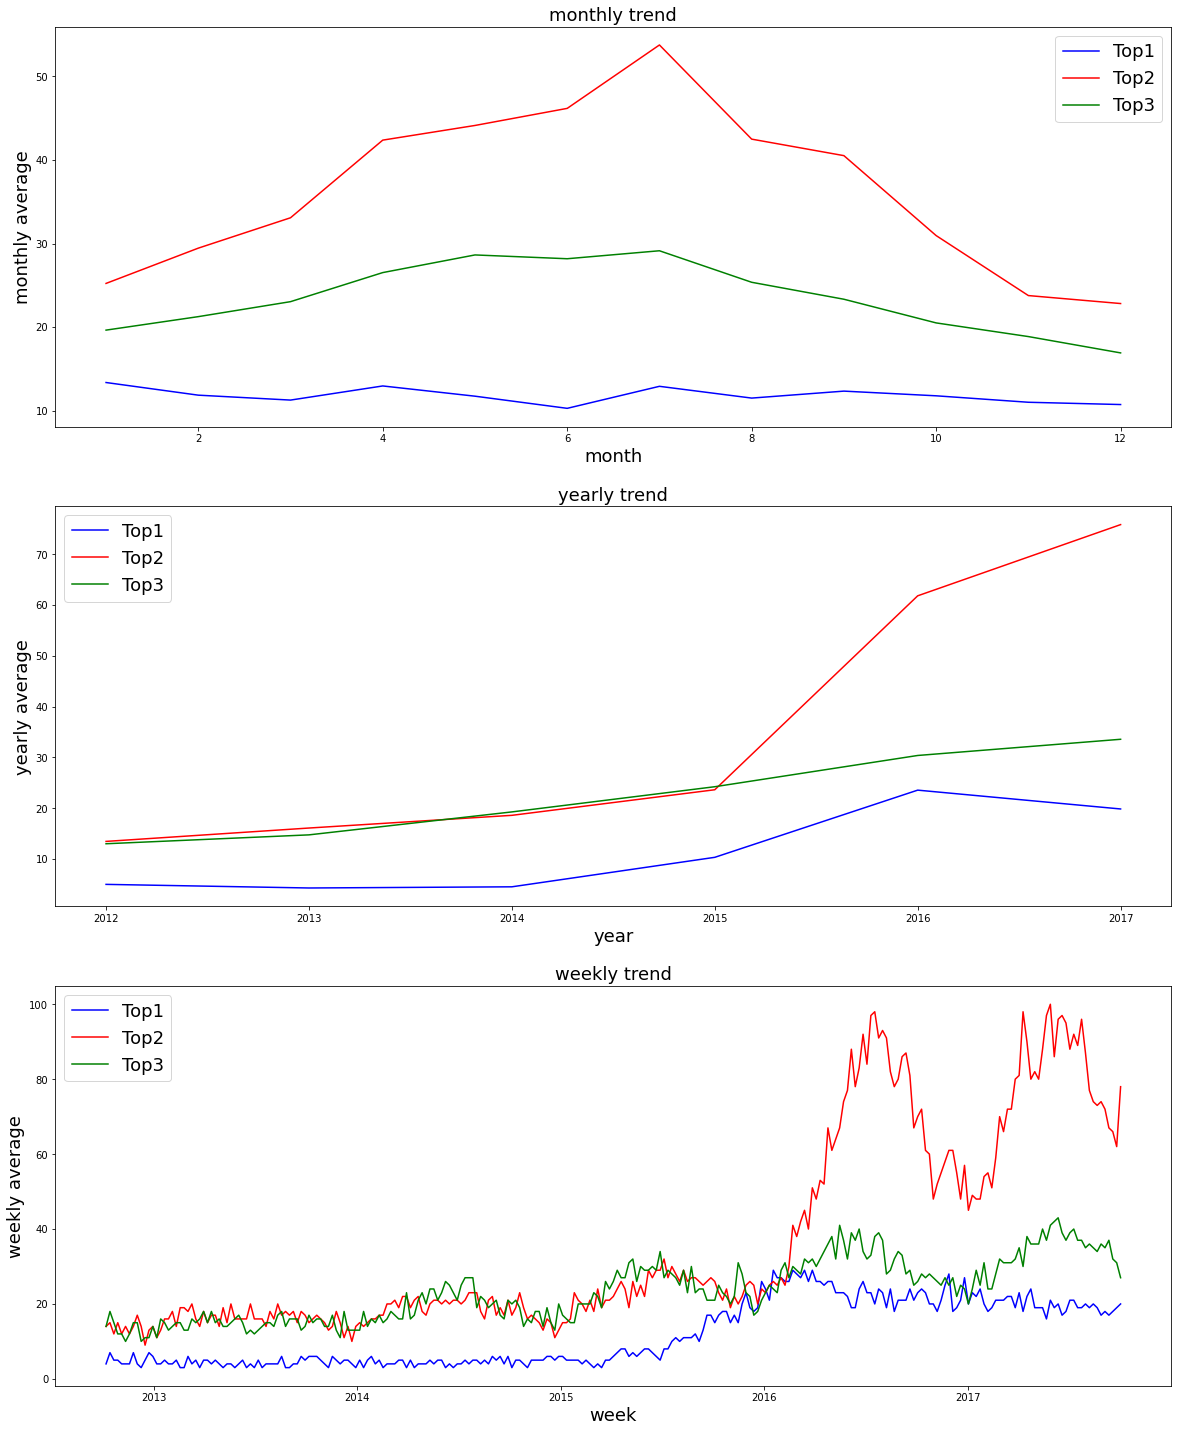

In [38]:
fig,ax = plt.subplots(3,1, figsize=(20,25))

ax[0].plot(trends_month.index,trends_month['top 1'],'b', label='Top1')
ax[0].plot(trends_month.index,trends_month['top 2'],'r',label='Top2')
ax[0].plot(trends_month.index,trends_month['top 3'],'g',label='Top3')
ax[0].set_xlabel('month',fontsize=18)
ax[0].set_ylabel('monthly average',fontsize=18)
ax[0].set_title('monthly trend',fontsize=18)
ax[0].legend(loc='best',fontsize=18)
ax[1].plot(trends_year.index,trends_year['top 1'],'b',label='Top1')
ax[1].plot(trends_year.index,trends_year['top 2'],'r',label='Top2')
ax[1].plot(trends_year.index,trends_year['top 3'],'g',label='Top3')
ax[1].set_xlabel('year',fontsize=18)
ax[1].set_ylabel('yearly average',fontsize=18)
ax[1].set_title('yearly trend',fontsize=18)
ax[1].legend(loc='best',fontsize=18)
ax[2].plot(trends.index,trends['top 1'],'b',label='Top1')
ax[2].plot(trends.index,trends['top 2'],'r',label='Top2')
ax[2].plot(trends.index,trends['top 3'],'g',label='Top3')
ax[2].set_xlabel('week',fontsize=18)
ax[2].set_ylabel('weekly average',fontsize=18)
ax[2].set_title('weekly trend',fontsize=18)
ax[2].legend(loc='best',fontsize=18)

Q1 : Assess the three trends in trends1.csv, which is performing best. Elaborate on
how you deﬁned "best performance".
A : From the above plot, can conclude that for weekly trend top2 performing best.
For monthly also top2 performing best. For yearly trend until 2015 both top2 and top3 performed equally best and in the following years top2 has significant growth in the trends. For the graph noticing that top1 has a consistent performance throughtout the years, months.

In [41]:
trends

,top 1,top 2,top 3
date,,,
2012-10-07,4,14,14
2012-10-14,7,15,18
2012-10-21,5,12,15
2012-10-28,5,15,12
2012-11-04,4,12,12
...,...,...,...
2017-09-03,18,72,35
2017-09-10,17,67,37
2017-09-17,18,66,32


Q2 : Quantify the performance over the last year - to establish what proportion of demand has changed.
A : Trend projection uses your past sales data to project your future sales.  ARIMA can make accurate predictions. By providing forecasted values for user-specified periods, it clearly shows the trends.
The quantify performance based on the above results are, 15% drop for demands for top1, 22% growth in top2 and 10% growth demand for top3.

To find the best fit based on the prediction.csv file, check the R2 score for the predictions of the model for each top1, top2, top3. The best performing model will have the higher R2 score.

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error as mae

In [43]:
predict_test = predict.loc[trends.index]
predict_test

,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1
date,,,,,,,,,
2012-10-07,6.464020,14.918372,12.852700,17.560586,16.691433,21.967562,19.348604,6.676299,6.814028
2012-10-14,6.405044,14.879459,13.460605,17.584433,16.864402,20.428943,18.149665,6.553469,6.678460
2012-10-21,5.594880,12.766397,12.500809,16.287381,15.672930,17.533925,15.621429,5.685904,5.801919
2012-10-28,4.556118,9.883558,11.040882,14.667064,14.128378,14.478612,13.020325,4.598339,4.706192
2012-11-04,4.203193,8.345088,10.553082,14.029395,13.566908,12.894532,11.970428,4.200978,4.297650
...,...,...,...,...,...,...,...,...,...
2017-09-03,18.932974,84.639440,36.390344,36.360716,36.359881,78.463999,76.071457,19.263615,19.240677
2017-09-10,19.393491,83.709639,34.626105,34.651718,34.573312,77.196136,74.388551,19.681597,19.664230
2017-09-17,19.792739,81.734849,32.537943,32.588455,32.443293,74.824516,71.611850,20.036997,20.028132


In [44]:
## R2 and mae findings

for i in ['fit', 'fit2', 'fit3']:
    for top in trends.columns:
        score = r2_score(trends[top],predict_test['{} {}'.format(i,top)])
        print("R2 Score for {} {} is :{}".format(i, top, score))

for i in ['fit', 'fit2', 'fit3']:
    for top in trends.columns:
        score = mae(trends[top],predict_test['{} {}'.format(i,top)])
        print("MAE for {} {} is :{}".format(i, top, score))

R2 Score for fit top 1 is :0.9354364386207087
R2 Score for fit top 2 is :0.9015873390289614
R2 Score for fit top 3 is :0.8668438317531642
R2 Score for fit2 top 1 is :0.9557775654922461
R2 Score for fit2 top 2 is :0.9725330810732744
R2 Score for fit2 top 3 is :0.9089395713417542
R2 Score for fit3 top 1 is :0.9568053957547444
R2 Score for fit3 top 2 is :0.9815380801949641
R2 Score for fit3 top 3 is :0.9158612816986901
MAE for fit top 1 is :1.7156599820682703
MAE for fit top 2 is :6.60952345345765
MAE for fit top 3 is :2.379407792028913
MAE for fit2 top 1 is :1.4057683626046702
MAE for fit2 top 2 is :3.3396571748358626
MAE for fit2 top 3 is :2.007173837406215
MAE for fit3 top 1 is :1.3904013882908033
MAE for fit3 top 2 is :2.80367161643414
MAE for fit3 top 3 is :1.9322881895278488


Q3 : Look at the predictions.csv ﬁle - there are three ﬁts for each trend, comment
on which you ﬁnd to be best.
A : From the findings for the period of 2012 - OCT 2017, fit3 performs best with highest R2 score for top1, top2 and top3. So model3 is the best model. 

Based on best model, fit3 is taken for further analysis to predict the proportional change which will happen in 3M, 6M and 12M

In [47]:
predict3 = predict.filter(regex='fit3[\s\w]+')
predict3

,fit3 top 3,fit3 top 2,fit3 top 1
date,,,
2012-10-07,16.691433,19.348604,6.814028
2012-10-14,16.864402,18.149665,6.678460
2012-10-21,15.672930,15.621429,5.801919
2012-10-28,14.128378,13.020325,4.706192
2012-11-04,13.566908,11.970428,4.297650
...,...,...,...
2018-09-27,36.037766,64.549945,17.533665
2018-09-28,36.139121,64.319097,17.594394
2018-09-29,36.265359,64.104769,17.656862


In [48]:
predict_month = predict3.groupby(predict3.index.month).mean()
predict_year = predict3.groupby(predict3.index.year).mean()

In [49]:
predict3[predict3.index >trends.index[-1]].resample('3M').mean()

,fit3 top 3,fit3 top 2,fit3 top 1
date,,,
2017-10-31,32.557458,62.001951,20.259699
2018-01-31,31.028972,51.736436,19.577721
2018-04-30,37.363544,69.397068,18.703099
2018-07-31,43.439196,86.658871,17.151979
2018-10-31,39.217294,72.022428,16.870457


In [50]:
predict3Month = predict3.resample('3M').mean().pct_change()
predict3Month

,fit3 top 3,fit3 top 2,fit3 top 1
date,,,
2012-10-31,NaN,NaN,NaN
2013-01-31,-0.142812,-0.182306,-0.044832
2013-04-30,0.160440,0.377321,-0.039201
2013-07-31,0.055768,-0.001679,-0.138488
2013-10-31,-0.057649,-0.101694,0.140833
2014-01-31,-0.041374,-0.082655,0.037508
2014-04-30,0.281212,0.307651,-0.016400
2014-07-31,0.286171,0.127811,-0.107813
2014-10-31,-0.177232,-0.123103,0.168419


In [51]:
predict6Month = predict3.resample('6M').mean().pct_change()
predict6Month

,fit3 top 3,fit3 top 2,fit3 top 1
date,,,
2012-10-31,NaN,NaN,NaN
2013-04-30,-0.074048,-0.028040,-0.063554
2013-10-31,0.101481,0.097953,-0.096260
2014-04-30,0.060962,0.001753,0.096693
2014-10-31,0.316696,0.199495,-0.040679
2015-04-30,-0.080983,-0.092442,0.144038
2015-10-31,0.346718,0.424933,0.888765
2016-04-30,-0.011706,0.244895,1.159775
2016-10-31,0.212186,1.313347,-0.061546


In [57]:
predict12Month = predict_year.pct_change()
predict12Month

,fit3 top 3,fit3 top 2,fit3 top 1
date,,,
2012,NaN,NaN,NaN
2013,0.114515,0.195416,-0.067591
2014,0.289343,0.153295,0.033980
2015,0.256261,0.230387,1.086397
2016,0.226352,1.577439,1.127888
2017,0.035996,-0.011789,-0.177710
2018,0.214253,0.189365,-0.109626


Plotting the graph for 3M, 6M and 12M

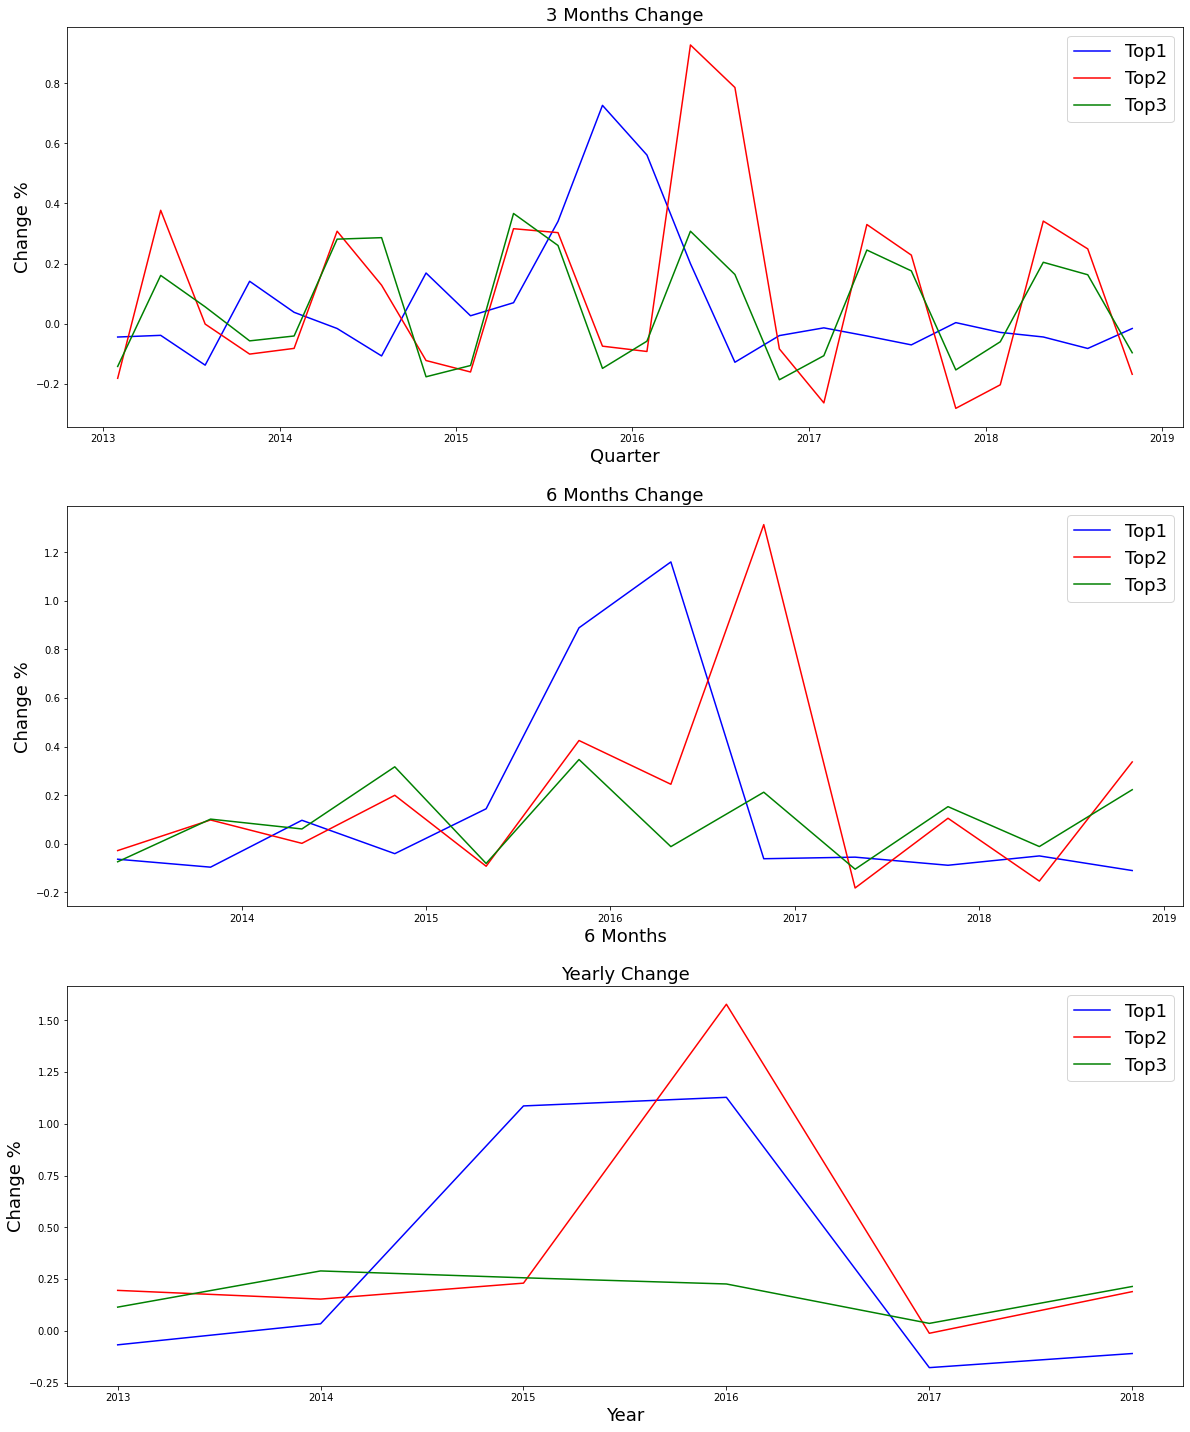

In [60]:
fig,ax = plt.subplots(3,1, figsize=(20,25))

ax[0].plot(predict3Month.index,predict3Month['fit3 top 1'],'b', label='Top1')
ax[0].plot(predict3Month.index,predict3Month['fit3 top 2'],'r',label='Top2')
ax[0].plot(predict3Month.index,predict3Month['fit3 top 3'],'g',label='Top3')
ax[0].set_xlabel('Quarter',fontsize=18)
ax[0].set_ylabel('Change %',fontsize=18)
ax[0].set_title('3 Months Change',fontsize=18)
ax[0].legend(loc='best',fontsize=18)
ax[1].plot(predict6Month.index,predict6Month['fit3 top 1'],'b',label='Top1')
ax[1].plot(predict6Month.index,predict6Month['fit3 top 2'],'r',label='Top2')
ax[1].plot(predict6Month.index,predict6Month['fit3 top 3'],'g',label='Top3')
ax[1].set_xlabel('6 Months',fontsize=18)
ax[1].set_ylabel('Change %',fontsize=18)
ax[1].set_title('6 Months Change',fontsize=18)
ax[1].legend(loc='best',fontsize=18)
ax[2].plot(predict12Month.index,predict12Month['fit3 top 1'],'b',label='Top1')
ax[2].plot(predict12Month.index,predict12Month['fit3 top 2'],'r',label='Top2')
ax[2].plot(predict12Month.index,predict12Month['fit3 top 3'],'g',label='Top3')
ax[2].set_xlabel('Year',fontsize=18)
ax[2].set_ylabel('Change %',fontsize=18)
ax[2].set_title('Yearly Change',fontsize=18)
ax[2].legend(loc='best',fontsize=18)

In [62]:
# Pivot table the change percentage for Top 3, to see the trend and how it is expected to grow
pd.pivot_table(predict3Month,columns=predict3Month.index.month,index=predict3Month.index.year,
               values='fit3 top 3')

date,1,4,7,10
date,,,,
2013,-0.142812,0.160440,0.055768,-0.057649
2014,-0.041374,0.281212,0.286171,-0.177232
2015,-0.139734,0.366709,0.260095,-0.149275
2016,-0.058640,0.307592,0.163528,-0.187219
2017,-0.107032,0.244949,0.175533,-0.154411
2018,-0.060614,0.204150,0.162609,-0.097191


In [65]:
# Pivot table the change percentage for Top 3, to see the trend and how it is expected to grow
pd.pivot_table(predict6Month,columns=predict6Month.index.month,index=predict6Month.index.year,
               values='fit3 top 3')

date,4,10
date,,
2013,-0.074048,0.101481
2014,0.060962,0.316696
2015,-0.080983,0.346718
2016,-0.011706,0.212186
2017,-0.104610,0.152807
2018,-0.011445,0.222463


In [66]:
# Next 3 months: using rolling median here to predict the next time step
pd.pivot_table(predict3Month,columns=predict3Month.index.month,index=predict3Month.index.year+1,
               values='fit3 top 3').shift(-1).rolling(window=3, min_periods = 1).median()

date,1,4,7,10
date,,,,
2014,-0.041374,0.281212,0.286171,-0.177232
2015,-0.090554,0.323961,0.273133,-0.163253
2016,-0.058640,0.307592,0.260095,-0.177232
2017,-0.107032,0.307592,0.175533,-0.154411
2018,-0.060614,0.244949,0.163528,-0.154411
2019,-0.083823,0.224550,0.169071,-0.125801


In [67]:
# Next 6 months: using rolling median here to predict the next time step
pd.pivot_table(predict6Month,columns=predict6Month.index.month,index=predict6Month.index.year+1,
               values='fit3 top 3').shift(-1).rolling(window=3, min_periods = 1).median()

date,4,10
date,,
2014,0.060962,0.316696
2015,-0.010010,0.331707
2016,-0.011706,0.316696
2017,-0.080983,0.212186
2018,-0.011706,0.212186
2019,-0.058028,0.187635


In [68]:
# 12M change: Please kindly ignore the date column here, should be +1 to each
predict12Month['fit3 top 3'].shift(-1).rolling(window=3, min_periods = 1).median()

date
2012    0.114515
2013    0.201929
2014    0.256261
2015    0.256261
2016    0.226352
2017    0.214253
2018    0.125125
Name: fit3 top 3, dtype: float64

Q4 : Quantify these predictions into an assessment of how you would expect the demand to change over the next 3, 6, 12 months.
A : Top3 was used in the anlysis. The dataset breakdown is 3M, 6M and 12M and then analyze the growth/decline percentage from the previous time step. Using the pivot table, it is further analyzed the effect on specific quarter or the said month every year. There seems to be a seasonal behaviour. From this, the expectation for the next time step is calculated from rolling median as shown in codes above.

Q5 :  Please create your own predictions based on the three types of tops.

A : ARIMA model is used to built based on three types of tops.

In [71]:
def decompose(ts_log,model="additive"):
    #Decomposition
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(ts_log,model=model)

    original = ts_log
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    return ("original",original), ('trend', trend),('seasonal',seasonal),('residual',residual)

In [72]:
def plot_grids(series,figsize=(12,8)):
    
    fig,ax = plt.subplots(4,1,figsize = figsize)

    for i,v in enumerate(series):
        ax[i].plot(v[1],label=v[0])
        ax[i].legend(loc='best')
    plt.tight_layout()
    return ax

In [73]:
decomposed_files = decompose(trends['top 3'], model='multiplicative')

In [74]:
decomposed_files

(('original',
  date
  2012-10-07    14
  2012-10-14    18
  2012-10-21    15
  2012-10-28    12
  2012-11-04    12
                ..
  2017-09-03    35
  2017-09-10    37
  2017-09-17    32
  2017-09-24    31
  2017-10-01    27
  Name: top 3, Length: 261, dtype: int64),
 ('trend',
  date
  2012-10-07   NaN
  2012-10-14   NaN
  2012-10-21   NaN
  2012-10-28   NaN
  2012-11-04   NaN
                ..
  2017-09-03   NaN
  2017-09-10   NaN
  2017-09-17   NaN
  2017-09-24   NaN
  2017-10-01   NaN
  Name: trend, Length: 261, dtype: float64),
 ('seasonal',
  date
  2012-10-07    0.948991
  2012-10-14    0.979725
  2012-10-21    0.940399
  2012-10-28    0.873392
  2012-11-04    0.833649
                  ...   
  2017-09-03    1.045491
  2017-09-10    0.949873
  2017-09-17    0.863451
  2017-09-24    0.906927
  2017-10-01    0.948991
  Name: seasonal, Length: 261, dtype: float64),
 ('residual',
  date
  2012-10-07   NaN
  2012-10-14   NaN
  2012-10-21   NaN
  2012-10-28   NaN
  2012-11-04  

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

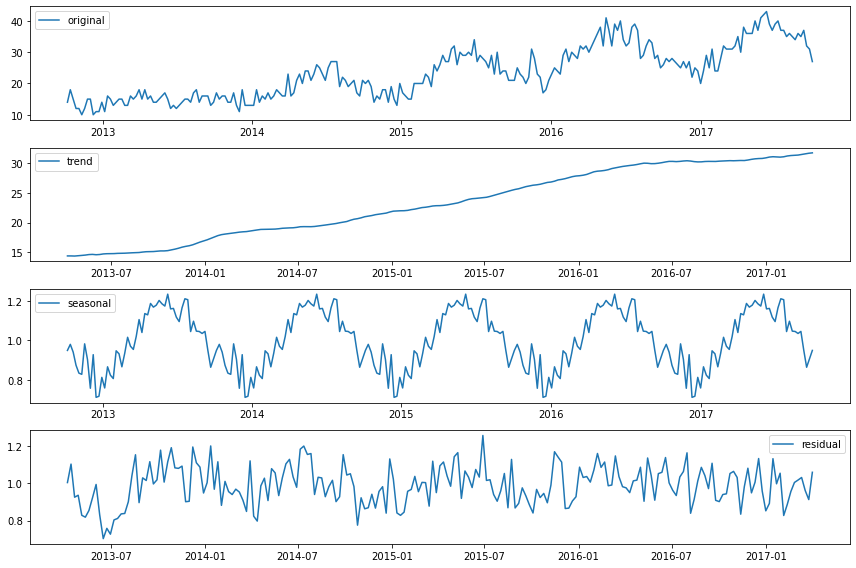

In [75]:
plot_grids(decomposed_files)

In [76]:
# Function to check for stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window_size):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window_size).mean()
    rolstd = timeseries.rolling(window=window_size).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(timeseries, color='blue',label='Original')
    ax.plot(rolmean, color='red', label='Rolling Mean')
    ax.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    fig.autofmt_xdate()
    ax.set_title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [77]:
# Function to plot time series models
import statsmodels as stm
import statsmodels.graphics
import statsmodels.graphics.tsaplots
def timeseriesplot(y,title,lags=None,figsize=(12,8)):
    fig = plt.figure(figsize=figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout,(0,0))
    hs_ax = plt.subplot2grid(layout,(0,1))
    acf_ax = plt.subplot2grid(layout,(1,0))
    pacf_ax = plt.subplot2grid(layout,(1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title,fontsize=14,fontweight='bold')
    y.plot(ax=hs_ax,kind='hist',bins=25)
    hs_ax.set_title("Histogram")
    stm.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
    stm.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
    acf_ax.set_xlim(0)
    pacf_ax.set_xlim(0)
    sns.despine()
    plt.tight_layout()
    return ts_ax,hs_ax,acf_ax,pacf_ax

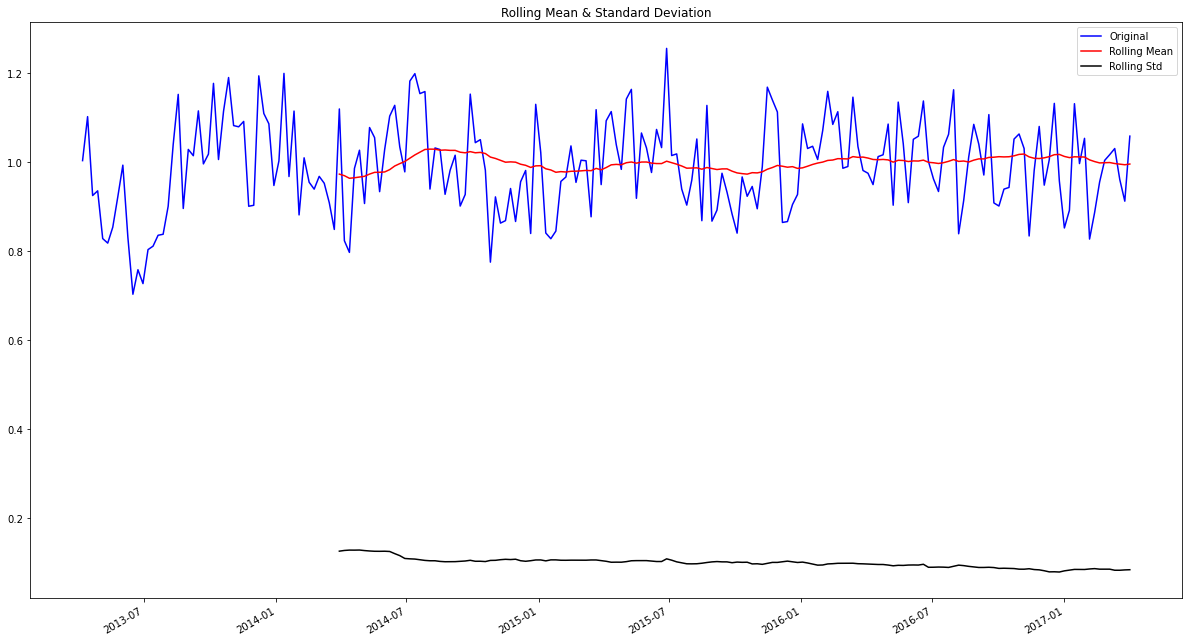

Results of Dickey-Fuller Test:
Test Statistic                -6.103108e+00
p-value                        9.728150e-08
#Lags Used                     1.500000e+01
Number of Observations Used    1.930000e+02
Critical Value (1%)           -3.464694e+00
Critical Value (5%)           -2.876635e+00
Critical Value (10%)          -2.574816e+00
dtype: float64


In [78]:
residual = decomposed_files[3][1]
residual.dropna(inplace=True)
test_stationarity(residual, window_size=52)

(<AxesSubplot:title={'center':'Residual'}, xlabel='date'>,
 <AxesSubplot:title={'center':'Histogram'}, ylabel='Frequency'>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:title={'center':'Partial Autocorrelation'}>)

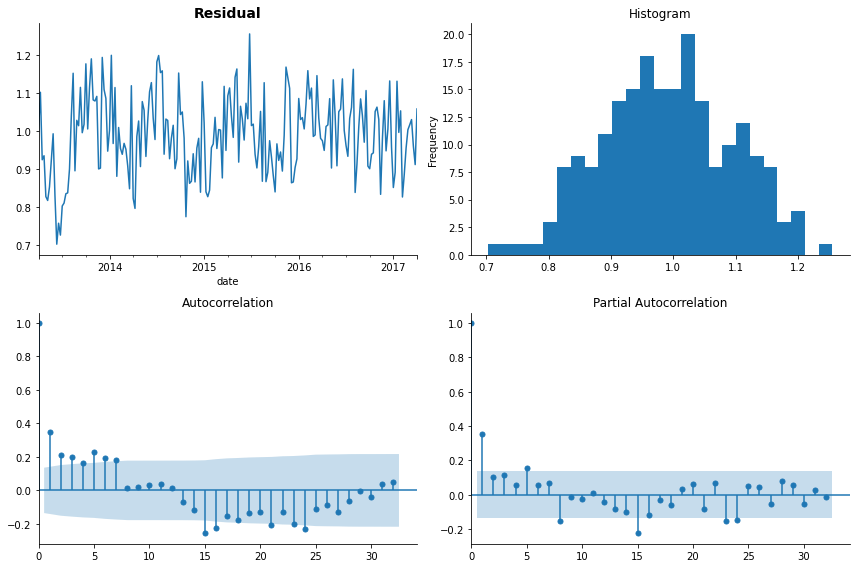

In [79]:
timeseriesplot(residual,"Residual",lags=32)

C:\Users\CISIR\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\CISIR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN

Time taken to fit: 25.06s
                              ARMA Model Results                              
Dep. Variable:                  resid   No. Observations:                  209
Model:                    ARMA(14, 1)   Log Likelihood                 207.985
Method:                       css-mle   S.D. of innovations              0.089
Date:                Sun, 27 Mar 2022   AIC                           -381.970
Time:                        22:38:55   BIC                           -325.150
Sample:                    04-07-2013   HQIC                          -358.998
                         - 04-02-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9970      0.005    220.478      0.000       0.988       1.006
ar.L1.resid      1.0387      0.101     10.275      0.000       0.841       1.237
ar.L2.resid     -0

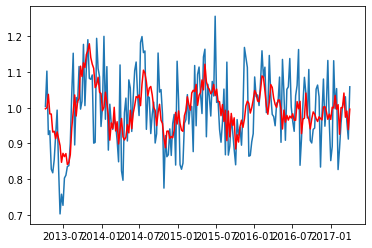

In [80]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from time import time
start = time()
model_MPD = ARIMA(residual, order=(14, 0, 1))
results_MPD = model_MPD.fit()
print('Time taken to fit: {:.2f}s'.format(time()-start))
print (results_MPD.summary())
print ("\n\n")
print (results_MPD.fittedvalues)
plt.plot(residual)
plt.plot(results_MPD.fittedvalues, color='red')

In [81]:
trend = decomposed_files[1][1]
seasonality = decomposed_files[2][1]

In [82]:
trend.dropna(inplace=True)
trend

date
2013-04-07    14.375000
2013-04-14    14.375000
2013-04-21    14.355769
2013-04-28    14.403846
2013-05-05    14.461538
                ...    
2017-03-05    31.423077
2017-03-12    31.528846
2017-03-19    31.644231
2017-03-26    31.730769
2017-04-02    31.798077
Name: trend, Length: 209, dtype: float64

In [83]:
seasonality

date
2012-10-07    0.948991
2012-10-14    0.979725
2012-10-21    0.940399
2012-10-28    0.873392
2012-11-04    0.833649
                ...   
2017-09-03    1.045491
2017-09-10    0.949873
2017-09-17    0.863451
2017-09-24    0.906927
2017-10-01    0.948991
Name: seasonal, Length: 261, dtype: float64

Q6 : Brieﬂy explain your choice of model, and how it performs better or worse than
the provided predictions.
A : The problem was treated as an univariate forecasting problem, and Multiplicate Decomposition algorithm was chosen. The trends data were broken down into trend, seasonality and residual components. Top3 was the worst performing fit amongst the  models. 